In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../data/heart.csv")

- **Age**: The age of the individual in years. (Numeric)

- **Sex**: The biological sex of the individual, typically coded as 0 for female and 1 for male. (Category)

- **ChestPainType**: The type of chest pain experienced by the individual, categorized into types such as: (Category)
  - Typical Angina
  - Atypical Angina
  - Non-Anginal Pain
  - Asymptomatic

- **RestingBP**: Resting blood pressure (measured in mmHg) taken while the person is at rest. (Numeric)

- **Cholesterol**: The cholesterol level in the blood, measured in mg/dL, including both LDL (bad cholesterol) and HDL (good cholesterol). (Numeric)

- **FastingBS**: Fasting blood sugar level, measured after fasting for 8+ hours, typically coded as 0 if <120 mg/dL and 1 if ≥120 mg/dL. (Category)

- **RestingECG**: Results of the resting electrocardiogram, which records the electrical activity of the heart. Categories often include:
  - Normal
  - Showing ST-T wave abnormalities (e.g., ischemia)
  - Indicating probable or definite left ventricular hypertrophy. (Category)

- **MaxHR**: Maximum heart rate achieved during physical activity, measured in beats per minute (bpm). (Numeric)

- **ExerciseAngina**: Presence of exercise-induced angina (chest pain due to reduced blood flow to the heart), typically coded as 0 for No and 1 for Yes. (Category)

- **Oldpeak**: The ST depression value on the ECG, representing changes in the heart's electrical activity during or after exercise. It indicates ischemia severity. (Numeric)

- **ST_Slope**: The slope of the ST segment during the ECG, categorized as: (Category)
  - Upsloping
  - Flat
  - Downsloping

- **HeartDisease**: Indicator of the presence of heart disease, typically coded as 0 for No (absence) and 1 for Yes (presence). (Target/Category)


In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
dataset.isna().sum().sum()

np.int64(0)

In [6]:
dataset.duplicated().sum().sum()  

np.int64(0)

In [7]:
dataset["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
dataset["RestingBP"].describe() # 0 does it make sense????

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [9]:
dataset["Age"].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [10]:
dataset['Cholesterol'].describe() # Can Cholesterol be 0???? actually No

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [11]:
dataset["FastingBS"].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [12]:
dataset['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [13]:
dataset['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
dataset['Oldpeak'].describe() # 

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [15]:
dataset["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### Why Old Peak can be negative?

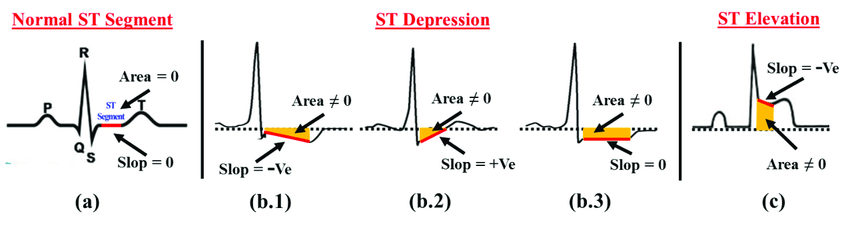

In [17]:
df = dataset.copy()

In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

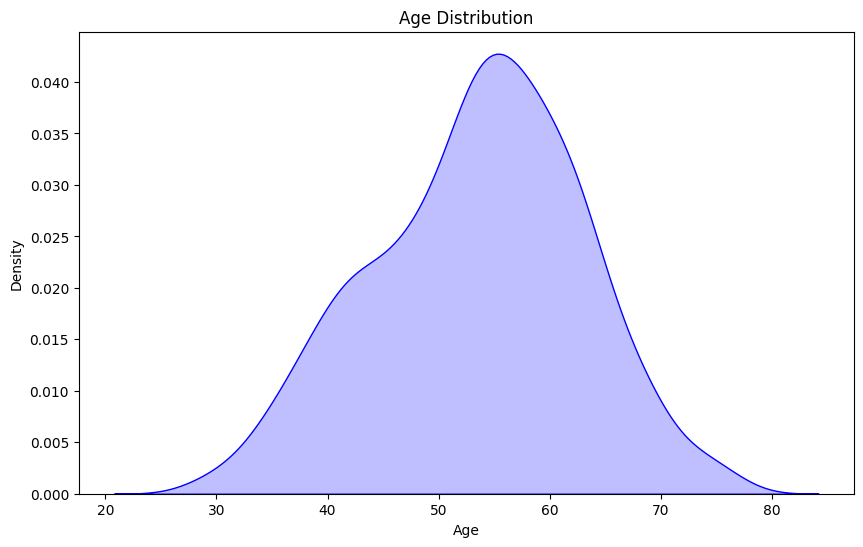

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], color='b', fill=True)
plt.title('Age Distribution')
plt.show()

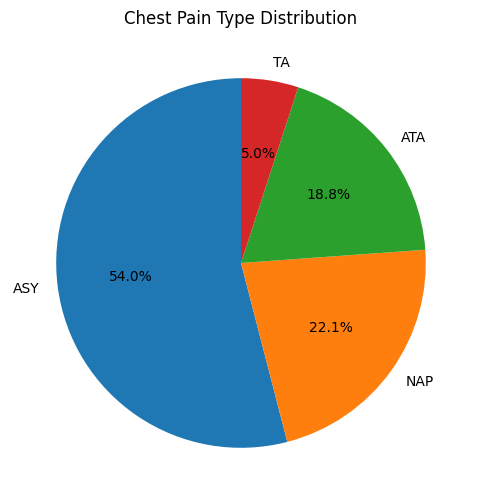

In [31]:
plt.figure(figsize=(10, 6))
plt.pie(df['ChestPainType'].value_counts(), labels=df['ChestPainType'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Chest Pain Type Distribution')
plt.show()

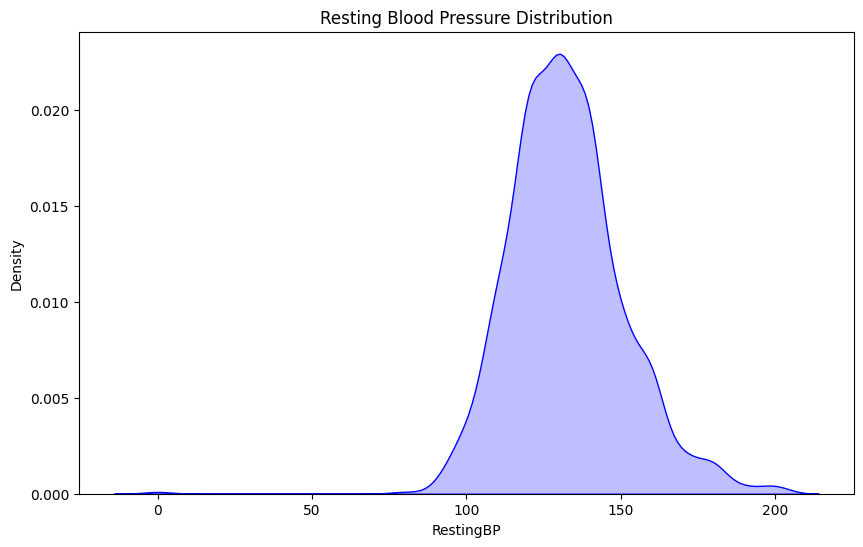

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['RestingBP'], color='b', fill=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

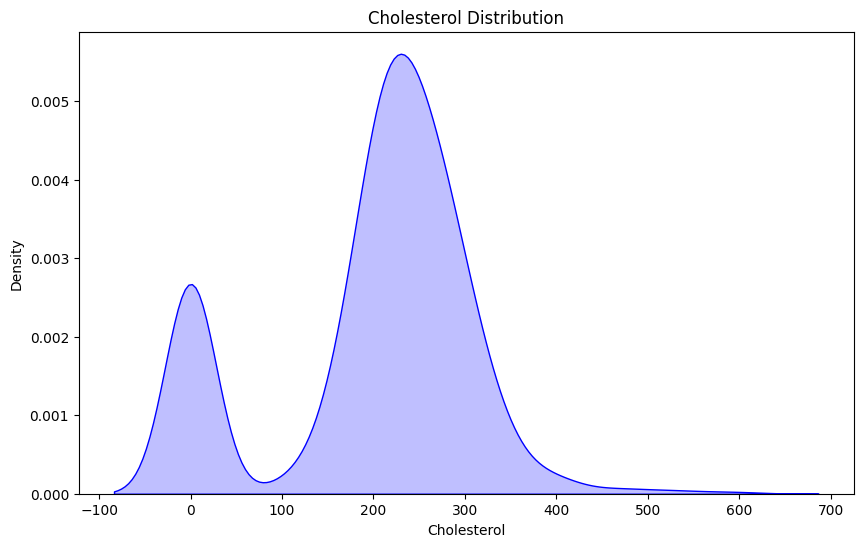

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Cholesterol'], color='b', fill=True)
plt.title('Cholesterol Distribution')
plt.show()

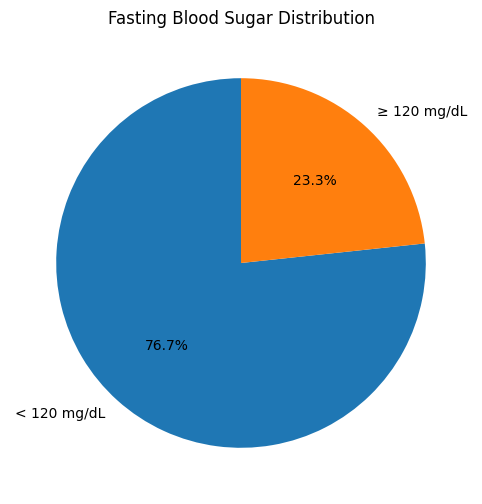

In [35]:
labels = ['< 120 mg/dL', '≥ 120 mg/dL']

plt.figure(figsize=(10, 6))
plt.pie(df['FastingBS'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Fasting Blood Sugar Distribution')
plt.show()

In [37]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

5


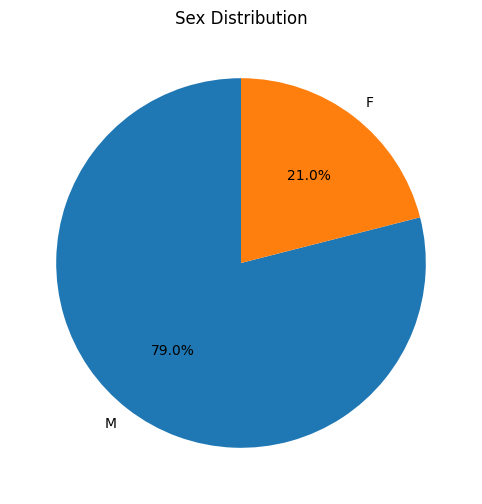

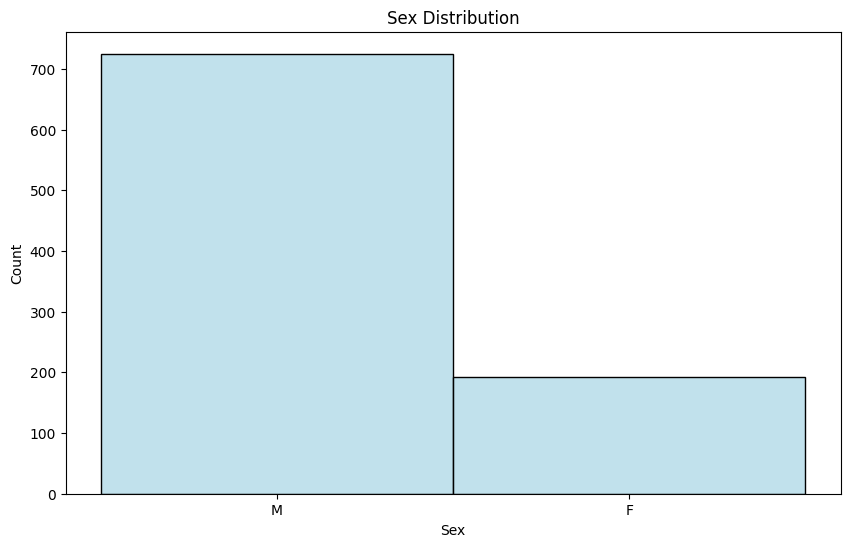

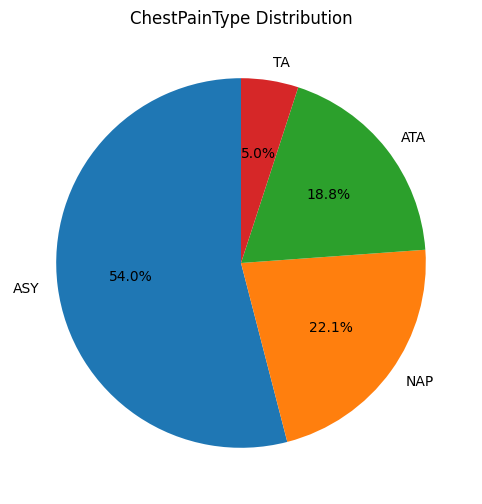

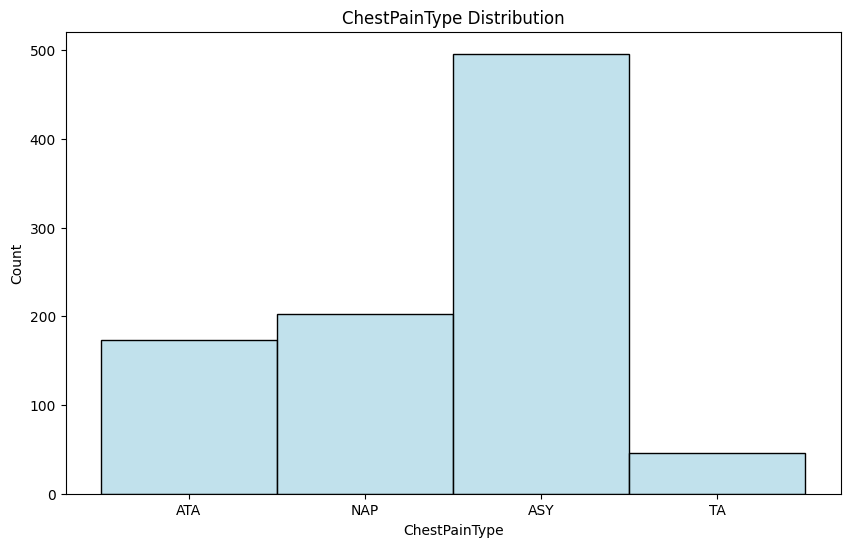

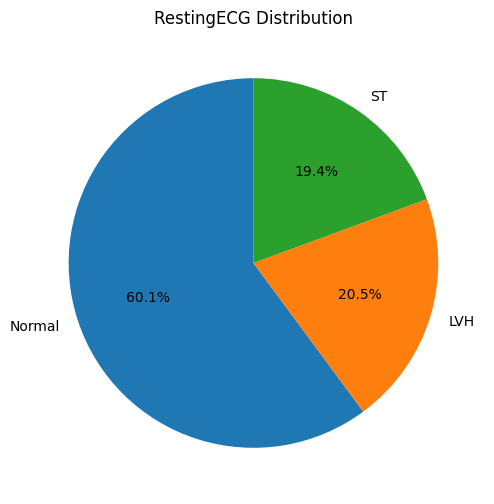

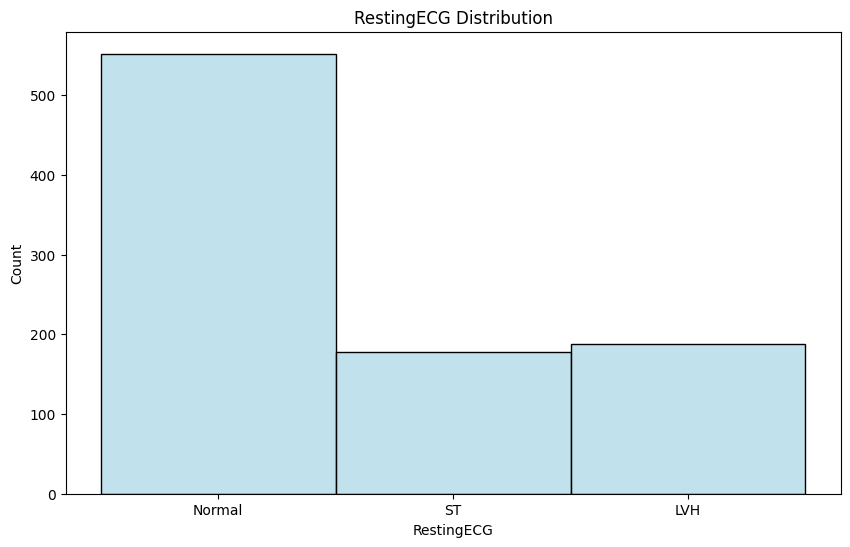

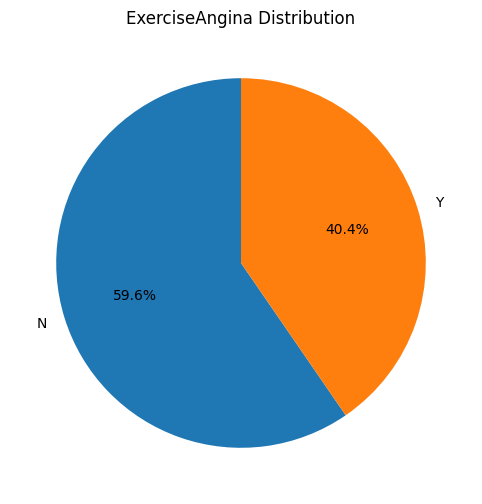

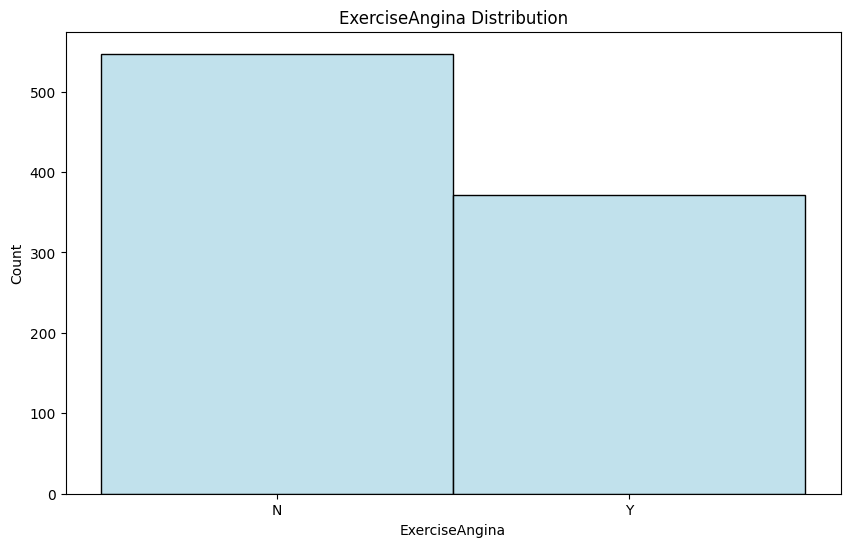

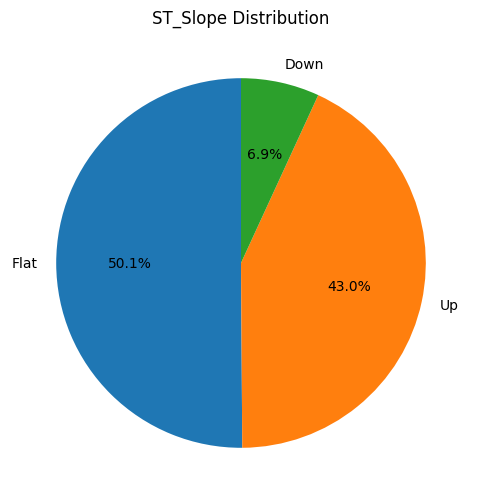

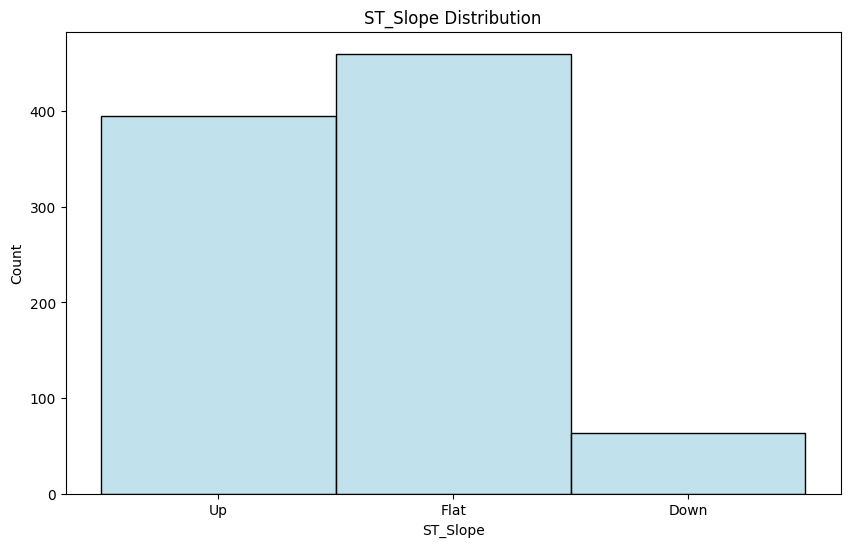

In [41]:
# Find Categorical columns & plot their Pie Charts & Histograms
categorical = df.select_dtypes(include=['object', 'category']).columns
print(len(categorical))

for i, col in enumerate(categorical):
    plt.figure(figsize=(10, 6))
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Distribution')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], color='lightblue')
    plt.title(f'{col} Distribution')
    plt.show()



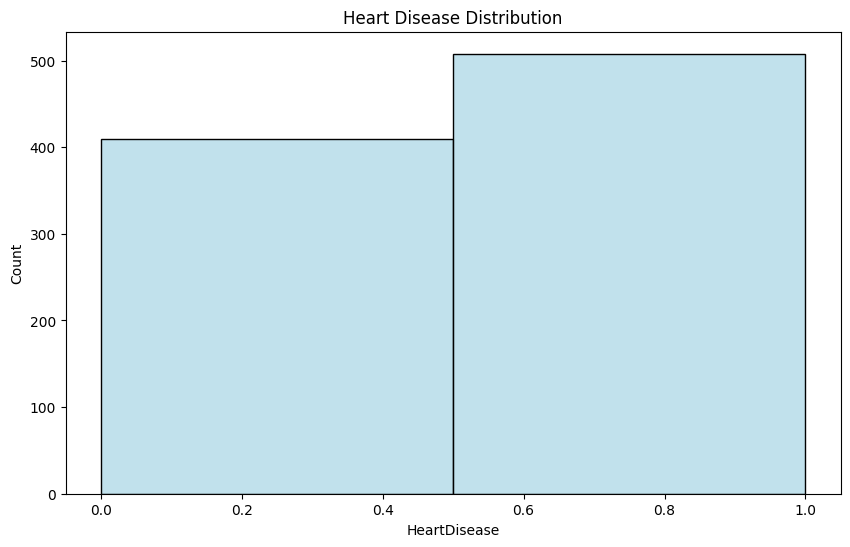

Text(0.5, 1.0, 'Heart Disease Distribution')

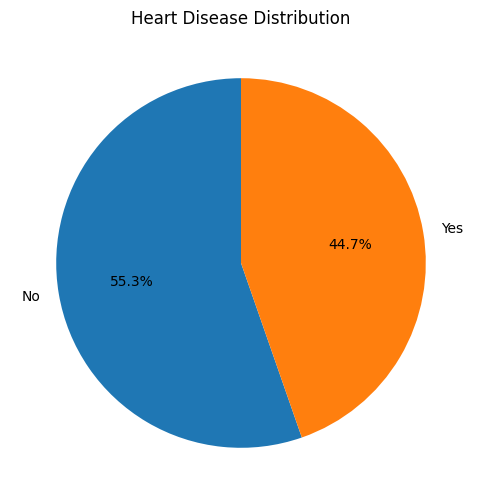

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HeartDisease'], color='lightblue', bins=2)
plt.title('Heart Disease Distribution')
plt.show()

labels = ['No', 'Yes']
plt.figure(figsize=(10, 6))
plt.pie(df['HeartDisease'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Distribution')

In [51]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
numerical = list(numerical)

In [53]:
numerical.remove('HeartDisease')

In [57]:
numerical.remove('FastingBS')

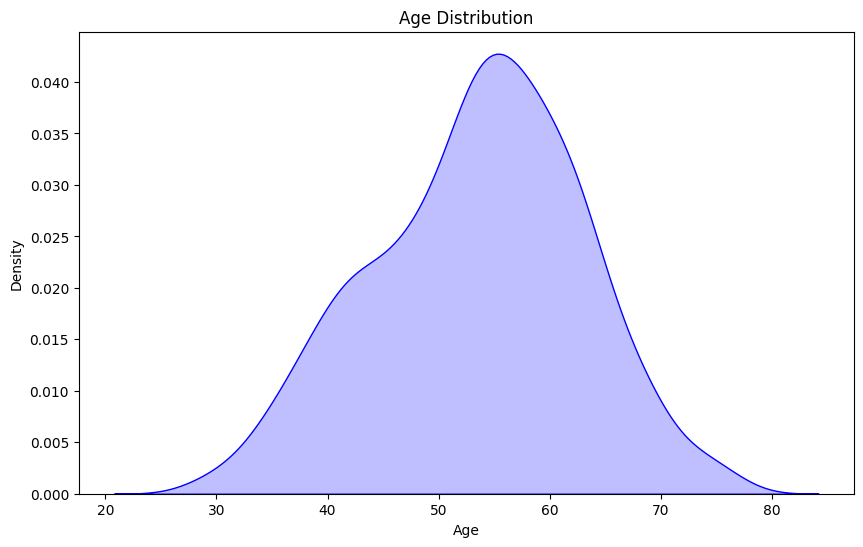

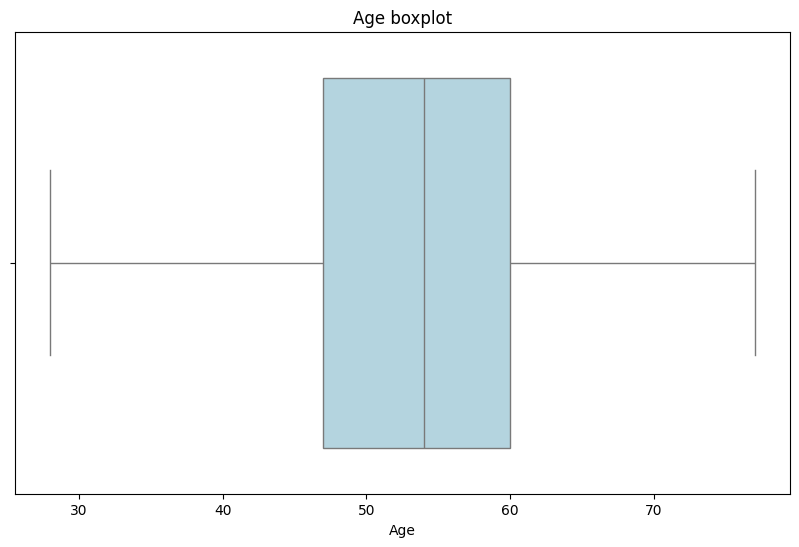

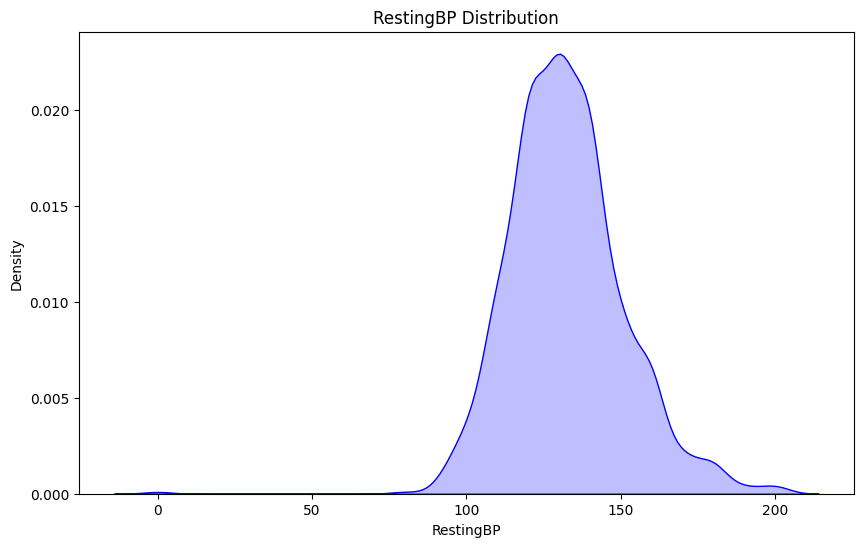

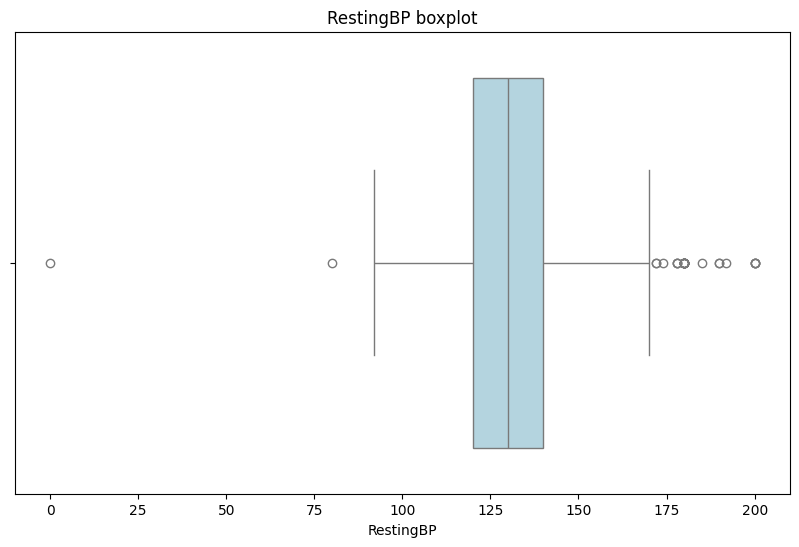

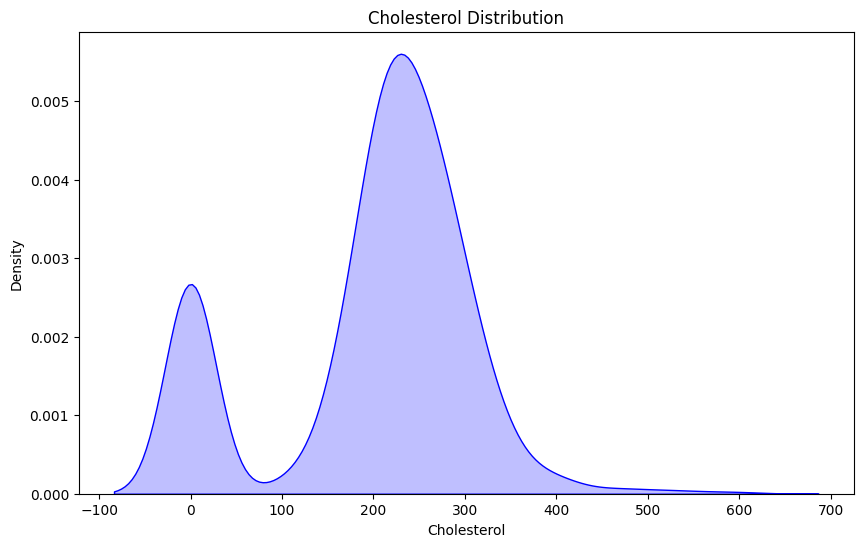

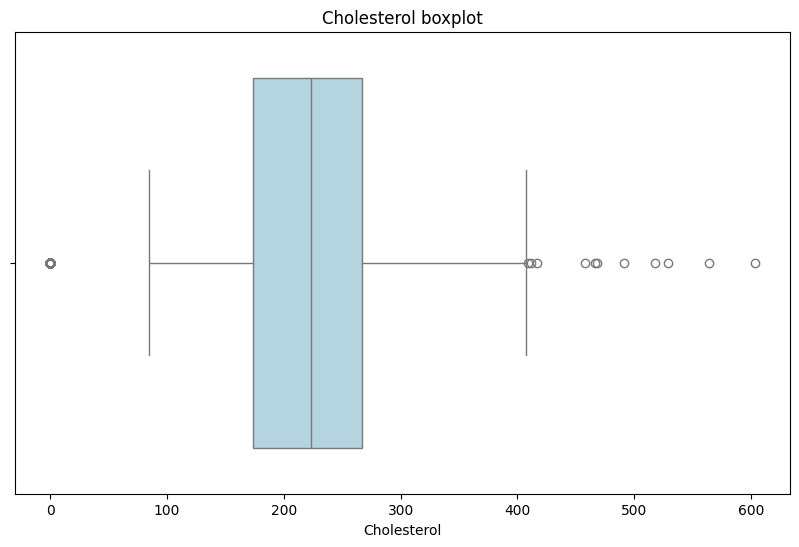

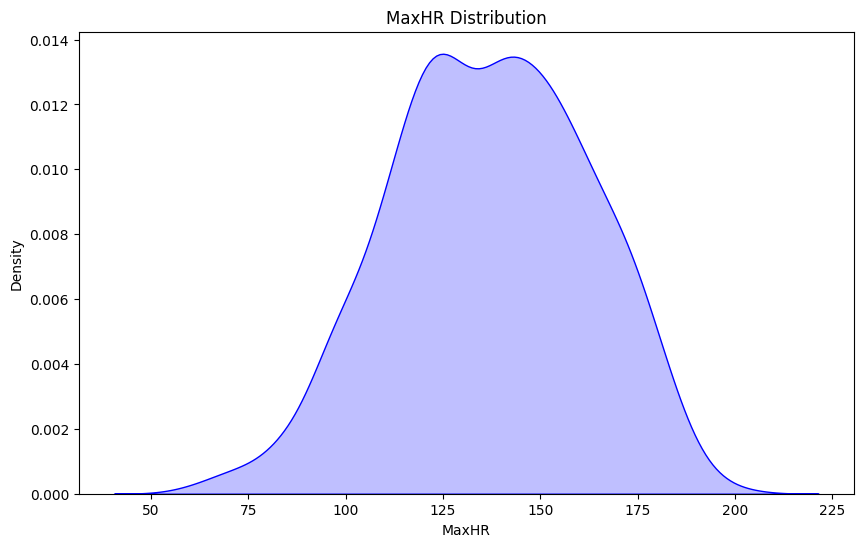

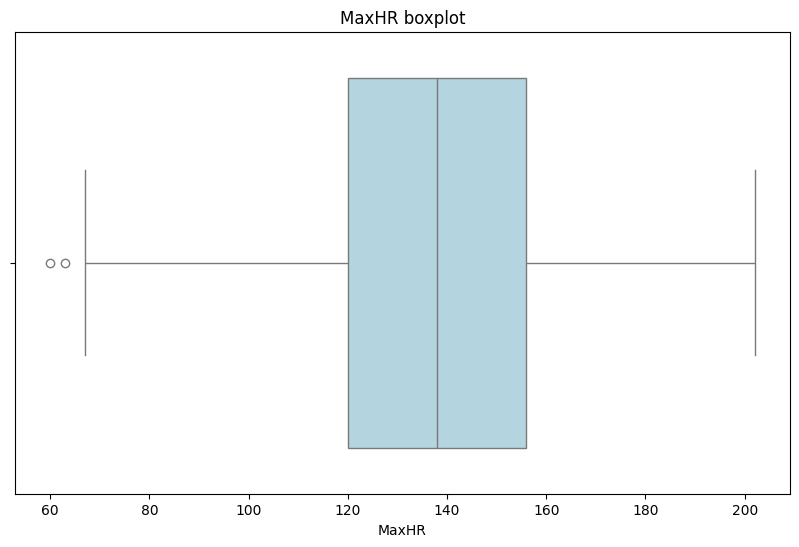

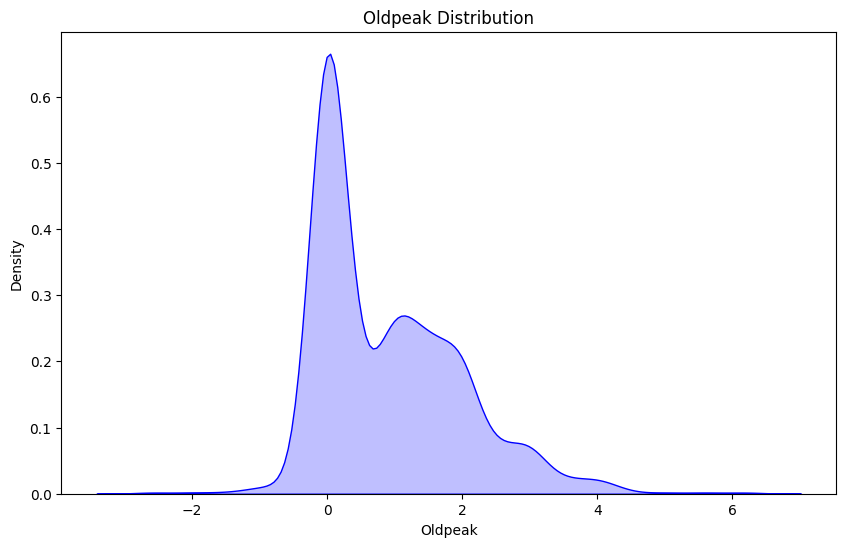

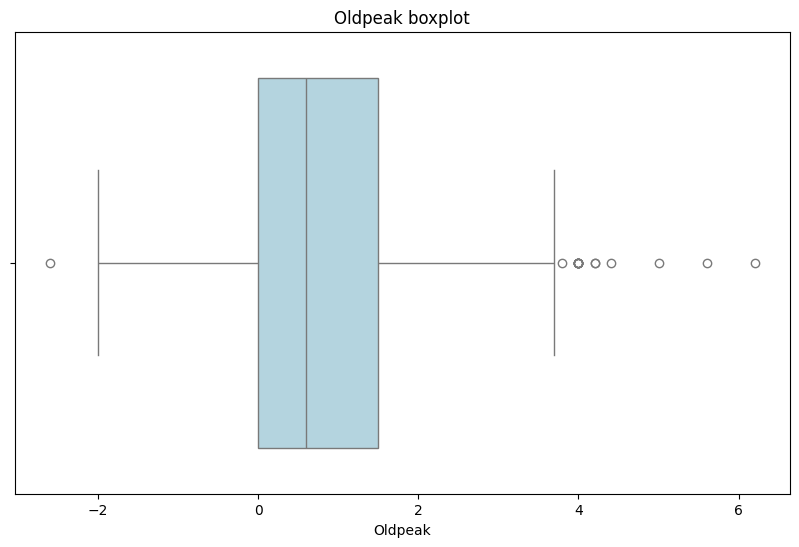

In [58]:
for i, col in enumerate(numerical):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], color='b', fill=True)
    plt.title(f'{col} Distribution')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'{col} boxplot')
    plt.show()

<Axes: xlabel='Age', ylabel='MaxHR'>

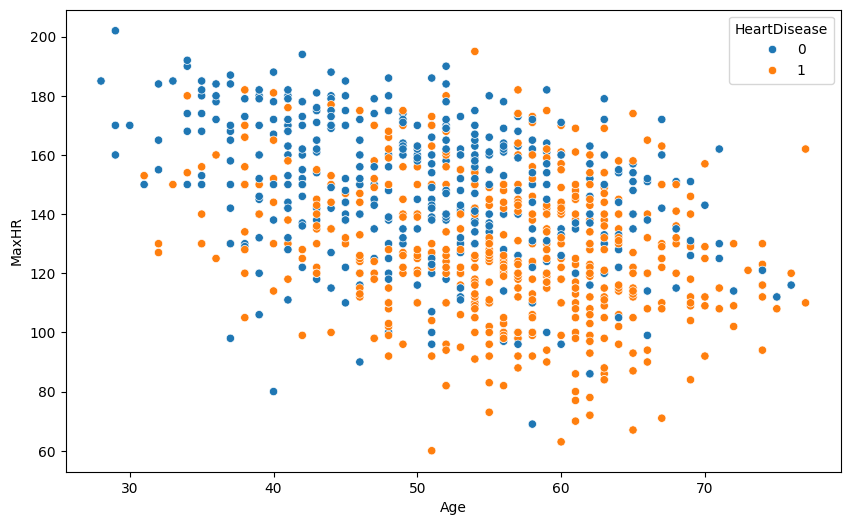

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MaxHR', data=df, hue='HeartDisease')

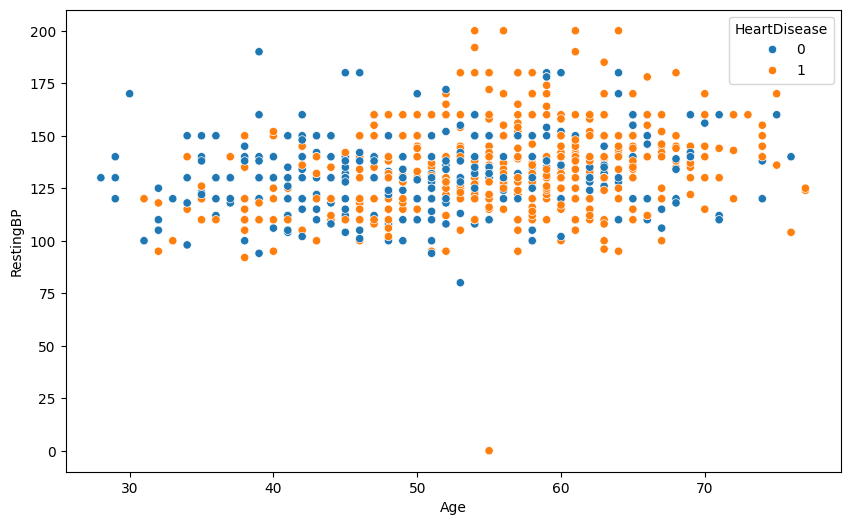

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='RestingBP', data=df, hue='HeartDisease')
plt.show()

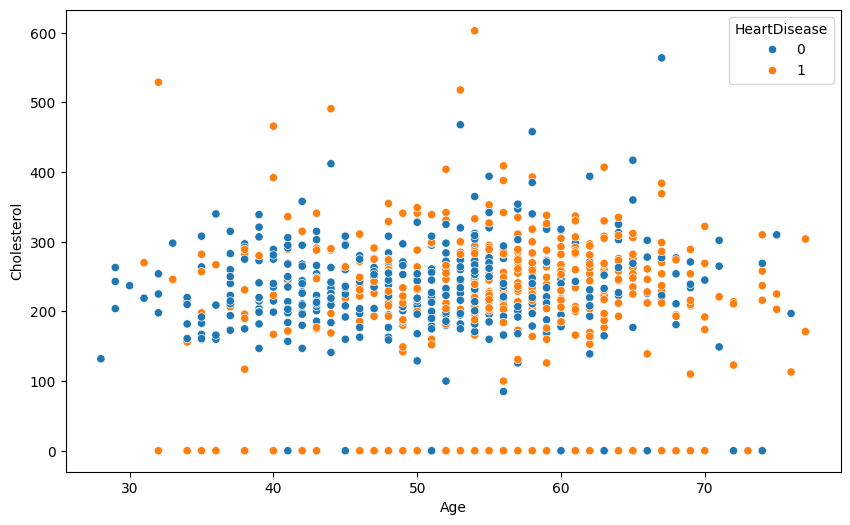

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol', data=df, hue='HeartDisease')
plt.show()

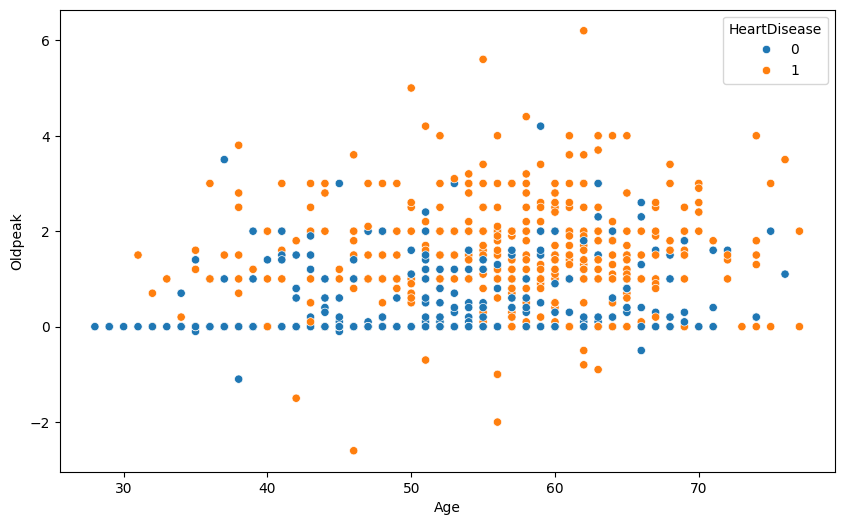

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Oldpeak', data=df, hue='HeartDisease')
plt.show()

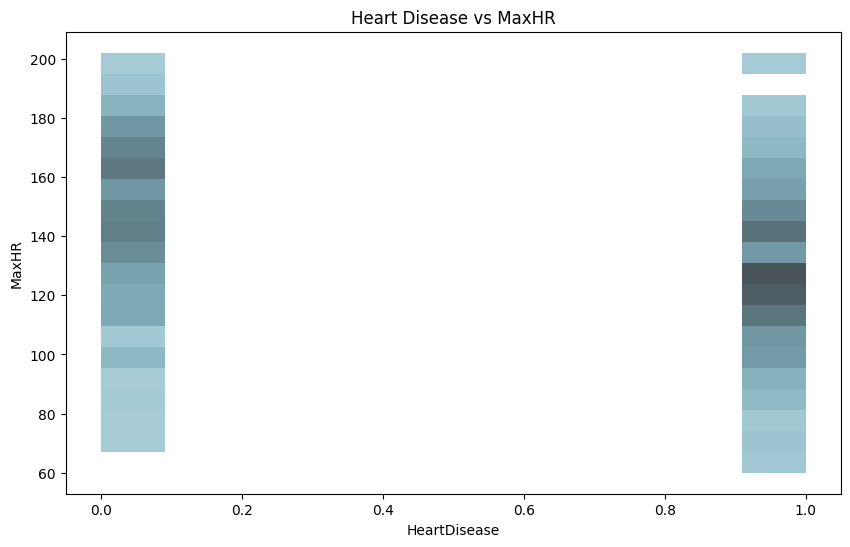

In [69]:
# Plot Heart Dieses with respect to MaxHR
plt.figure(figsize=(10, 6))
sns.histplot(x='HeartDisease', y='MaxHR', data=df, color='lightblue')
plt.title('Heart Disease vs MaxHR')
plt.show()

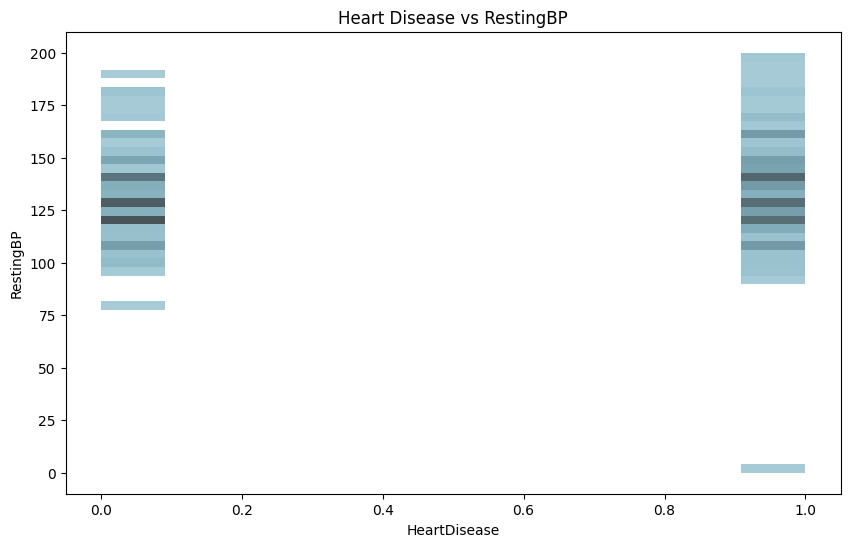

In [70]:
# Plot Heart Dieses with respect to RestingBP

plt.figure(figsize=(10, 6))
sns.histplot(x='HeartDisease', y='RestingBP', data=df, color='lightblue')
plt.title('Heart Disease vs RestingBP')
plt.show()

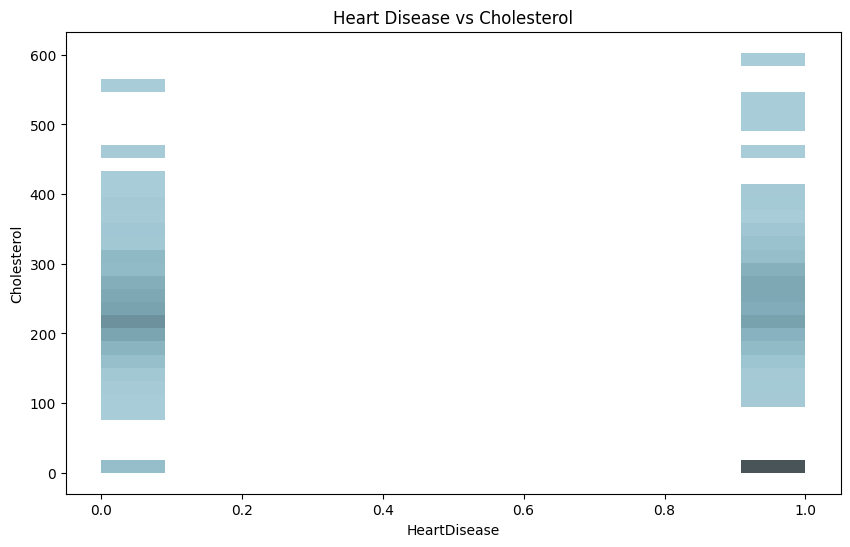

In [71]:
# Plot Heart Dieses with respect to Cholesterol

plt.figure(figsize=(10, 6))
sns.histplot(x='HeartDisease', y='Cholesterol', data=df, color='lightblue')
plt.title('Heart Disease vs Cholesterol')
plt.show()